## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 


Postać Newtona – jedna z metod przedstawiania wielomianu interpolacyjnego. Dla wielomianu stopnia n wybiera się n+1 punktów ,x0, x1, ... , xn i buduje wielomian postaci:   

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/69b5c716adb5b441a3f7ccce30a98d42729a33dd)   
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5060449ae8f920705646a5e2035b0cc3f22e9e72)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from tabulate import tabulate
from scipy.misc import derivative
import scipy.interpolate as interpolate

error_array_Newton = []
error_array_Hermitea = []
error_array_Bspline = []


def calculate_coefficient(x, y):
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return np.array(a)


def get_newton_polynomial(coefficients_array, x_array):
    X = sympy.symbols('x')
    n = len(coefficients_array)
    newton_polynomial = 0
    for i in range(n):
        tmp = 1
        for j in range(i):
            tmp *= (X - x_array[j])
        newton_polynomial += tmp * coefficients_array[i]
    return sympy.simplify(newton_polynomial)


def calculate_value(newton_polynomial, x):
    X = sympy.symbols('x')
    return newton_polynomial.evalf(subs={X: x})


def func_to_table(min, max, num_of_point, func, name_func, display_table):
    table = []
    x_array = []
    y_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        table.append([name_func, i, func(i)])
        x_array.append(i)
        y_array.append(func(i))
    if display_table:
      print(tabulate(table, headers=['L.P.', 'x', 'f(x)'], tablefmt="fancy_grid", floatfmt=".10f"))
    return x_array, y_array


def compare_charts(min, max, num_of_point, func1, func2, func_name, newton_polynomial):
    x_array = []
    func1_array = []
    func2_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        x_array.append(i)
        func1_array.append(func1(newton_polynomial, i))
        func2_array.append(func2(i))

    plt.plot(x_array, func1_array, label="Interpolation "+func_name)
    plt.plot(x_array, func2_array, label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()


def compare_results(min, max, num_of_point, func1, func2 , name_func, newton_polynomial, error_array):
    table = []
    step = (max - min) / num_of_point
    for i in np.arange(min+(step/2), max+(step/2), step):
        table.append([i, func2(i),func1(newton_polynomial, i), abs(func2(i)-func1(newton_polynomial, i))/abs(func1(newton_polynomial, i))])
        error_array.append(abs(func2(i)-func1(newton_polynomial, i))/abs(func1(newton_polynomial, i)))
    print(tabulate(table, headers=['x', name_func, 'interpolation '+name_func, 'relative error [%]'], tablefmt="fancy_grid", floatfmt=".10f"))


def newton_interpolation(min, max, number_of_points, display_table):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table(min, max, number_of_points, np.math.sqrt, "sqrt(x)", display_table)
    f_x_array, f_y_array = func_to_table(min, max, number_of_points, f, "x^3 + 2*x", display_table)
    sin_x_array, sin_y_array = func_to_table(min, max, number_of_points, np.math.sin, "sin(x)", display_table)

    coefficient_sqrt = calculate_coefficient(sqrt_x_array, sqrt_y_array)
    compare_charts(min, max, 10000, calculate_value, np.math.sqrt, "sqrt", get_newton_polynomial(coefficient_sqrt, sqrt_x_array))
    compare_results(min, max, number_of_points, calculate_value, np.math.sqrt, "sqrt", get_newton_polynomial(coefficient_sqrt, sqrt_x_array), error_array_Newton)

    coefficient_sin = calculate_coefficient(sin_x_array, sin_y_array)
    compare_charts(min, max, 10000, calculate_value, np.math.sin, "sin", get_newton_polynomial(coefficient_sin, sin_x_array))
    compare_results(min, max, number_of_points, calculate_value, np.math.sin, "sin", get_newton_polynomial(coefficient_sin, sin_x_array), error_array_Newton)

    coefficient_f = calculate_coefficient(f_x_array, f_y_array)
    compare_charts(min, max, 10000, calculate_value, f, "f", get_newton_polynomial(coefficient_f, f_x_array))
    compare_results(min, max, number_of_points, calculate_value, f, "f", get_newton_polynomial(coefficient_f, f_x_array), error_array_Newton)


Interpolacja Newtona dla 3 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.3333333333 │ 1.8257418584 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.6666666667 │ 2.5819888975 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  3.3333333333 │   43.7037037037 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  6.6666666667 │  309.6296296296 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │ 10.0000000000 │ 1020.0000000000 │
╘═══════════╧═══════════════╧═════════════════╛

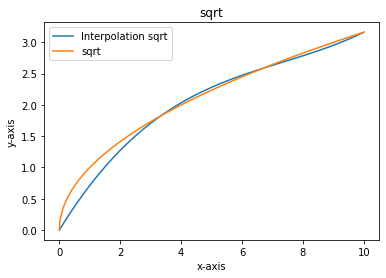

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.6666666667 │ 1.2909944487 │         1.1024038155 │         0.1710721884 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2360679775 │         2.2817061964 │         0.0200017947 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.3333333333 │ 2.8867513459 │         2.8382820294 │         0.0170769909 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


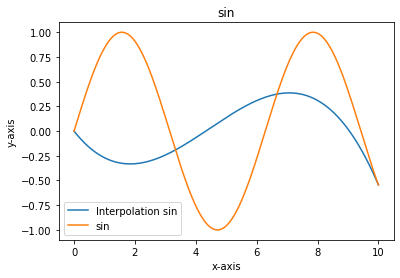

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.6666666667 │  0.9954079578 │       -0.3295810442 │         4.0202221133 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │ -0.9589242747 │        0.1372669075 │         7.9858372427 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.3333333333 │  0.8872941081 │        0.2403126699 │         2.6922485545 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


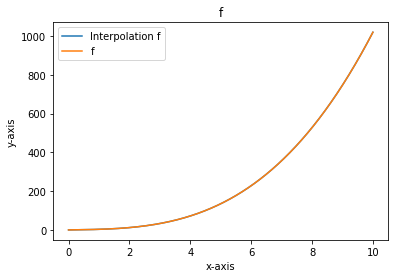

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.6666666667 │   7.9629629630 │      7.9629629630 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.3333333333 │ 595.3703703704 │    595.3703703704 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [7]:
newton_interpolation(0, 10, 3, True)

Interpolacja Newtona dla 4 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.5000000000 │   20.6250000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  5.0000000000 │  135.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2

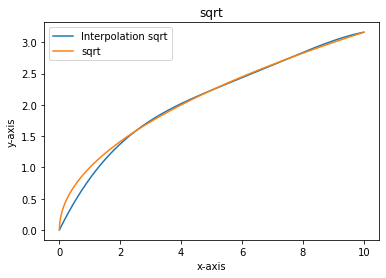

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.2500000000 │ 1.1180339887 │         0.9820659964 │         0.1384509726 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.7500000000 │ 1.9364916731 │         1.9596017579 │         0.0117932558 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 6.2500000000 │ 2.5000000000 │         2.4853806275 │         0.0058821463 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.7500000000 │ 2.9580398915 │         2.9830674779 │         0.0083898828 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


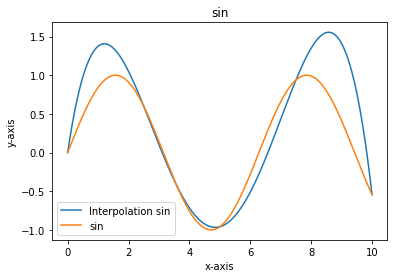

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.2500000000 │  0.9489846194 │        1.4054289399 │         0.3247722511 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.7500000000 │ -0.5715613187 │       -0.5530228042 │         0.0335221520 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 6.2500000000 │ -0.0331792165 │       -0.3068165894 │         0.8918597700 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.7500000000 │  0.6247239538 │        1.5325091963 │         0.5923522317 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


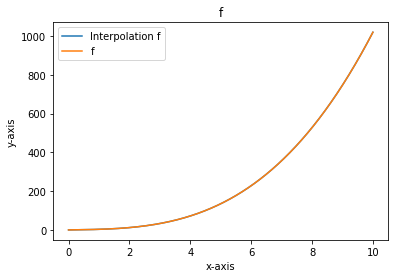

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.2500000000 │   4.4531250000 │      4.4531250000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.7500000000 │  60.2343750000 │     60.2343750000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 6.2500000000 │ 256.6406250000 │    256.6406250000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.7500000000 │ 687.4218750000 │    687.4218750000 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [8]:
newton_interpolation(0, 10, 4, True)

Interpolacja Newtona dla 5 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.0000000000 │ 1.4142135624 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  4.0000000000 │ 2.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.0000000000 │ 2.4494897428 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.0000000000 │ 2.8284271247 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.0000000000 │   12.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  4.00

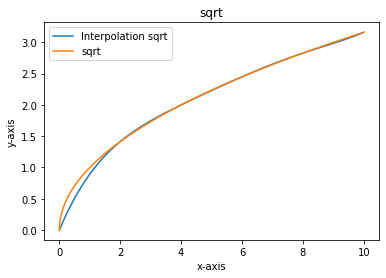

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.0000000000 │ 1.0000000000 │         0.8944129014 │         0.1180518511 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.0000000000 │ 1.7320508076 │         1.7458526511 │         0.0079055031 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2360679775 │         2.2298604579 │         0.0027838153 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 7.0000000000 │ 2.6457513111 │         2.6521102940 │         0.0023977068 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 9.0000000000 │ 3.0000000000 │         2.9849436742 │         0.0050440904 │
╘══════════════╧══════════════╧══════════════════════╧══════════

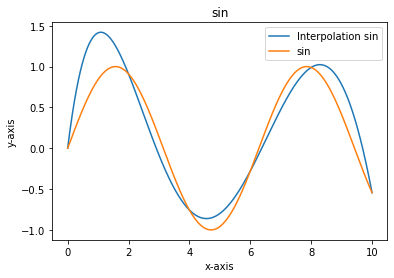

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.0000000000 │  0.8414709848 │        1.4133655930 │         0.4046331756 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.0000000000 │  0.1411200081 │       -0.0839243079 │         2.6815153042 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │ -0.9589242747 │       -0.7989498211 │         0.2002309148 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 7.0000000000 │  0.6569865987 │        0.4729880066 │         0.3890132299 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 9.0000000000 │  0.4121184852 │        0.7803760692 │         0.4718975869 │
╘══════════════╧═══════════════╧═════════════════════╧══════════

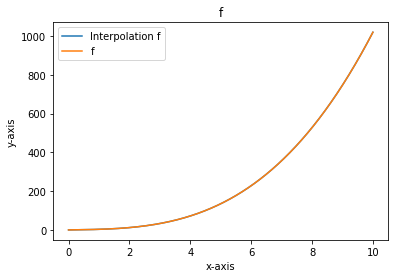

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.0000000000 │   3.0000000000 │      3.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.0000000000 │  33.0000000000 │     33.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 7.0000000000 │ 357.0000000000 │    357.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 9.0000000000 │ 747.0000000000 │    747.0000000000 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛

In [9]:
newton_interpolation(0, 10, 5, True)

Interpolacja Newtona dla 8 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.2500000000 │ 1.1180339887 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.7500000000 │ 1.9364916731 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.2500000000 │ 2.5000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.7500000000 │ 2.9580398915 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞

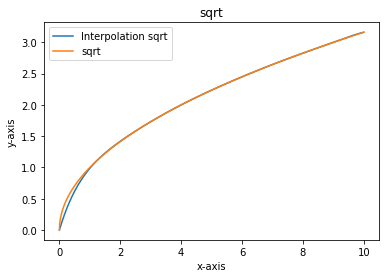

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 0.6250000000 │ 0.7905694150 │         0.7283871006 │         0.0853698732 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 1.8750000000 │ 1.3693063938 │         1.3740887282 │         0.0034803680 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.1250000000 │ 1.7677669530 │         1.7666175872 │         0.0006506025 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 4.3750000000 │ 2.0916500663 │         2.0921829621 │         0.0002547080 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.6250000000 │ 2.3717082451 │         2.3712888349 │         0.0001768702 │
├──────────────┼──────────────┼──────────────────────┼──────────

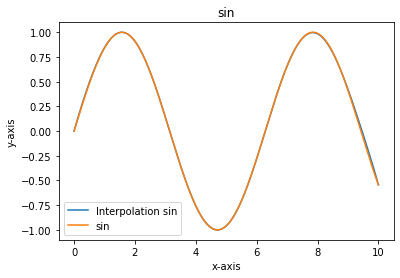

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 0.6250000000 │  0.5850972729 │        0.5931719178 │         0.0136126553 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 1.8750000000 │  0.9540857816 │        0.9536543206 │         0.0004524292 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.1250000000 │  0.0165918922 │        0.0162424864 │         0.0215118413 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 4.3750000000 │ -0.9436221923 │       -0.9430559505 │         0.0006004329 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.6250000000 │ -0.6116822500 │       -0.6125820554 │         0.0014688733 │
├──────────────┼───────────────┼─────────────────────┼──────────

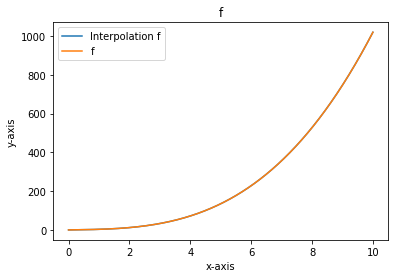

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 0.6250000000 │   1.4941406250 │      1.4941406250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 1.8750000000 │  10.3417968750 │     10.3417968750 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.1250000000 │  36.7675781250 │     36.7675781250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 4.3750000000 │  92.4902343750 │     92.4902343750 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.6250000000 │ 189.2285156250 │    189.2285156250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤

In [10]:
newton_interpolation(0, 10, 8, True)

Zadanie 2: Interpolacj metodą Hermite'a
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji).

In [0]:
def get_hermite_polynomial(x_array, y_array):
    """"  x_array tablica argumetow(węzłów)
          y_array tablica wartości funkcji dla poszczególnych węzłów,
          jeśli węzeł pojawia się k-aty raz to do tablicy y_array wstawiamy k-tą pochodną
          np: x0 = 1, f(x0)=2, f'(x0)=5 ,
              x1 = 2, f(x1)=4, f'(x1)=7 oraz x_array = [1, 1, 2, 2] to y_array = [2, 5, 4, 7]
     """
    n = len(x_array)
    derivative_array = [0] * n
    if n != len(y_array):
        print("Error")
        exit(1)
    # wyliczenie krotności poszczególnych węzłów
    for i in range(1, n):
        if x_array[i] == x_array[i - 1]:
            derivative_array[i] = derivative_array[i - 1] + 1
        else:
            derivative_array[i] = 0

    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            if derivative_array[j] == 0:
                y_array[j] = (y_array[j] - y_array[int(j - 1 - derivative_array[j - 1])]) / (x_array[j] - x_array[j - i]);
            else:
                y_array[j] /= float(i)
                derivative_array[j] -= 1

    for j in range(n - 1, -1, -1):
        for i in range(j, n - 1, 1):
            y_array[i] = y_array[i] - y_array[i + 1] * x_array[j]

    hermite_polynomial = 0
    X = sympy.symbols('x')
    for i in range(n):
        hermite_polynomial += y_array[i]*pow(X,i)
    return hermite_polynomial


def calculate_hermite_value(hermite_polynomial, x):
    X = sympy.symbols('x')
    return hermite_polynomial.evalf(subs={X: x})


def hermite_interpolation(min, max, number_of_points, display_table):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table(min, max, number_of_points, np.math.sqrt, "sqrt(x)", display_table)
    f_x_array, f_y_array = func_to_table(min, max, number_of_points, f, "x^3 + 2*x", display_table)
    sin_x_array, sin_y_array = func_to_table(min, max, number_of_points, np.math.sin, "sin(x)", display_table)

    sqrt_hermite_polynomial = get_hermite_polynomial(sqrt_x_array, sqrt_y_array)
    sin_hermite_polynomial = get_hermite_polynomial(sin_x_array, sin_y_array)
    f_hermite_polynomial = get_hermite_polynomial(f_x_array, f_y_array)

    compare_charts(min, max, 10000, calculate_hermite_value, np.math.sqrt, "sqrt", sqrt_hermite_polynomial)
    compare_results(min, max, number_of_points, calculate_hermite_value, np.math.sqrt, "sqrt", sqrt_hermite_polynomial, error_array_Hermitea)

    compare_charts(min, max, 10000, calculate_hermite_value, np.math.sin, "sin", sin_hermite_polynomial)
    compare_results(min, max, number_of_points, calculate_hermite_value, np.math.sin, "sin", sin_hermite_polynomial, error_array_Hermitea)

    compare_charts(min, max, 10000, calculate_hermite_value, f, "f", f_hermite_polynomial)
    compare_results(min, max, number_of_points, calculate_hermite_value, f, "f", f_hermite_polynomial, error_array_Hermitea)


Interpolacja Hermite'a dla 3 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.3333333333 │ 1.8257418584 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.6666666667 │ 2.5819888975 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  3.3333333333 │   43.7037037037 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  6.6666666667 │  309.6296296296 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │ 10.0000000000 │ 1020.0000000000 │
╘═══════════╧═══════════════╧═════════════════╛

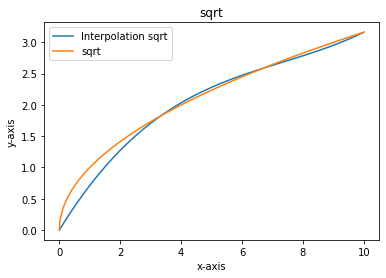

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.6666666667 │ 1.2909944487 │         1.1024038155 │         0.1710721884 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2360679775 │         2.2817061964 │         0.0200017947 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.3333333333 │ 2.8867513459 │         2.8382820294 │         0.0170769909 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


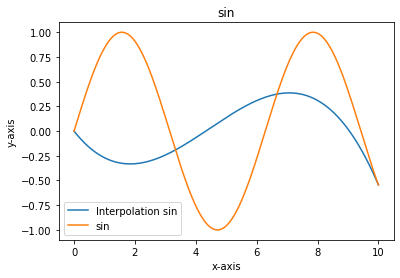

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.6666666667 │  0.9954079578 │       -0.3295810442 │         4.0202221133 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │ -0.9589242747 │        0.1372669075 │         7.9858372427 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.3333333333 │  0.8872941081 │        0.2403126699 │         2.6922485545 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


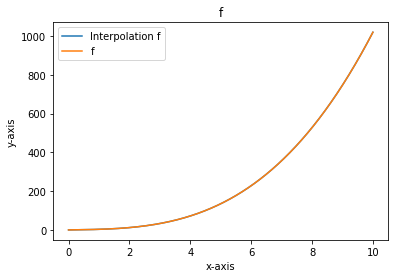

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.6666666667 │   7.9629629630 │      7.9629629630 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.3333333333 │ 595.3703703704 │    595.3703703704 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [12]:
hermite_interpolation(0, 10, 3, True)

Interpolacja Hermite'a dla 4 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.5000000000 │   20.6250000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  5.0000000000 │  135.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2

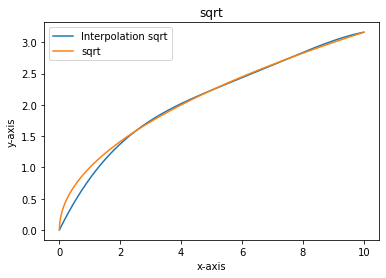

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.2500000000 │ 1.1180339887 │         0.9820659964 │         0.1384509726 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.7500000000 │ 1.9364916731 │         1.9596017579 │         0.0117932558 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 6.2500000000 │ 2.5000000000 │         2.4853806275 │         0.0058821463 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.7500000000 │ 2.9580398915 │         2.9830674779 │         0.0083898828 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


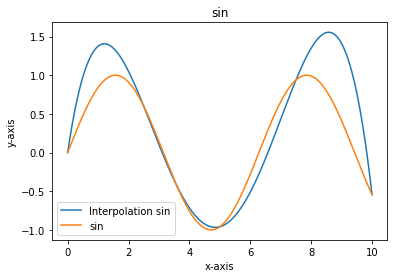

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.2500000000 │  0.9489846194 │        1.4054289399 │         0.3247722511 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.7500000000 │ -0.5715613187 │       -0.5530228042 │         0.0335221520 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 6.2500000000 │ -0.0331792165 │       -0.3068165894 │         0.8918597700 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.7500000000 │  0.6247239538 │        1.5325091963 │         0.5923522317 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


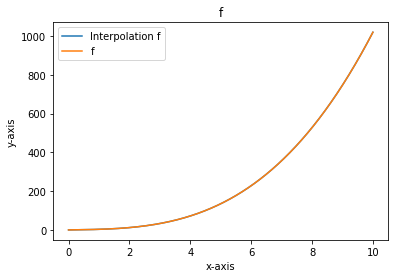

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.2500000000 │   4.4531250000 │      4.4531250000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.7500000000 │  60.2343750000 │     60.2343750000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 6.2500000000 │ 256.6406250000 │    256.6406250000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.7500000000 │ 687.4218750000 │    687.4218750000 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [13]:
hermite_interpolation(0, 10, 4, True)

Interpolacja Hermite'a dla 5 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.0000000000 │ 1.4142135624 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  4.0000000000 │ 2.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.0000000000 │ 2.4494897428 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.0000000000 │ 2.8284271247 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.0000000000 │   12.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  4.00

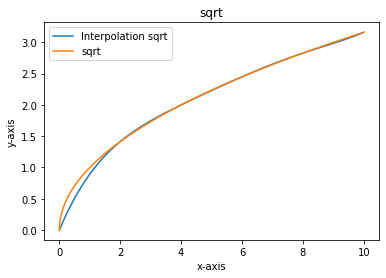

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.0000000000 │ 1.0000000000 │         0.8944129014 │         0.1180518511 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.0000000000 │ 1.7320508076 │         1.7458526511 │         0.0079055031 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2360679775 │         2.2298604579 │         0.0027838153 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 7.0000000000 │ 2.6457513111 │         2.6521102940 │         0.0023977068 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 9.0000000000 │ 3.0000000000 │         2.9849436742 │         0.0050440904 │
╘══════════════╧══════════════╧══════════════════════╧══════════

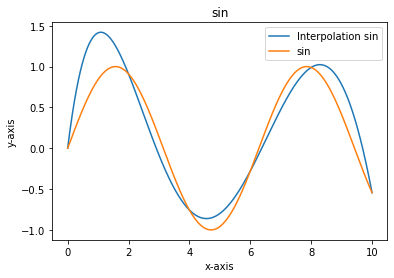

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.0000000000 │  0.8414709848 │        1.4133655930 │         0.4046331756 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.0000000000 │  0.1411200081 │       -0.0839243079 │         2.6815153042 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │ -0.9589242747 │       -0.7989498211 │         0.2002309148 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 7.0000000000 │  0.6569865987 │        0.4729880066 │         0.3890132299 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 9.0000000000 │  0.4121184852 │        0.7803760692 │         0.4718975869 │
╘══════════════╧═══════════════╧═════════════════════╧══════════

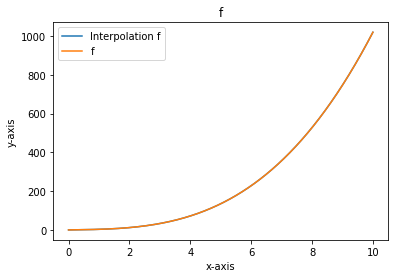

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.0000000000 │   3.0000000000 │      3.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.0000000000 │  33.0000000000 │     33.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 7.0000000000 │ 357.0000000000 │    357.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 9.0000000000 │ 747.0000000000 │    747.0000000000 │         0.0000000000 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛

In [14]:
hermite_interpolation(0, 10, 5, True)

Interpolacja Hermite'a dla 8 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.2500000000 │ 1.1180339887 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.7500000000 │ 1.9364916731 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.2500000000 │ 2.5000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.7500000000 │ 2.9580398915 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞

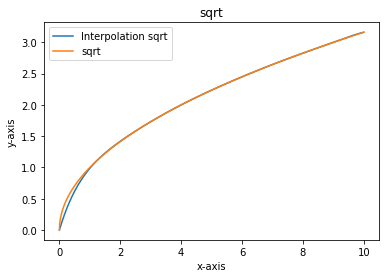

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 0.6250000000 │ 0.7905694150 │         0.7283871006 │         0.0853698732 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 1.8750000000 │ 1.3693063938 │         1.3740887282 │         0.0034803680 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.1250000000 │ 1.7677669530 │         1.7666175872 │         0.0006506025 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 4.3750000000 │ 2.0916500663 │         2.0921829621 │         0.0002547080 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.6250000000 │ 2.3717082451 │         2.3712888349 │         0.0001768702 │
├──────────────┼──────────────┼──────────────────────┼──────────

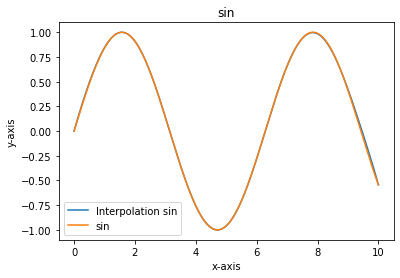

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 0.6250000000 │  0.5850972729 │        0.5931719178 │         0.0136126553 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 1.8750000000 │  0.9540857816 │        0.9536543206 │         0.0004524292 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.1250000000 │  0.0165918922 │        0.0162424864 │         0.0215118413 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 4.3750000000 │ -0.9436221923 │       -0.9430559505 │         0.0006004329 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.6250000000 │ -0.6116822500 │       -0.6125820554 │         0.0014688733 │
├──────────────┼───────────────┼─────────────────────┼──────────

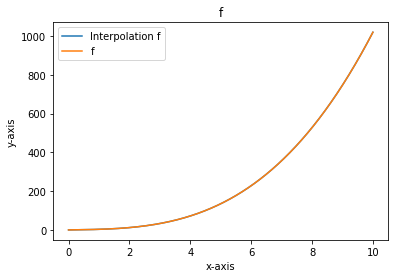

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 0.6250000000 │   1.4941406250 │      1.4941406250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 1.8750000000 │  10.3417968750 │     10.3417968750 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.1250000000 │  36.7675781250 │     36.7675781250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 4.3750000000 │  92.4902343750 │     92.4902343750 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.6250000000 │ 189.2285156250 │    189.2285156250 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤

In [15]:
hermite_interpolation(0, 10, 8, True)

Poniżej napisałem dodatkową funkcje żeby zaprezentować, że interpolacja działa także poprawnie kiedy zwiększymy krotności poszczególnych punktów oraz dodamy potrzebne pochodne :

In [0]:
"""point_numbers - tablica numerów węzłów dla których zwiększymy krotności do 2 i policzymy niezbędne pochodne"""
def func_to_table_with_derivative(min, max, num_of_point, func, name_func, point_numbers):
    table = []
    x_array = []
    y_array = []
    step = (max - min) / num_of_point
    counter = 0
    for i in np.arange(min, max + step, step):
        table.append([name_func, i, func(i)])
        x_array.append(i)
        y_array.append(func(i))
        if counter in point_numbers:
            detrative_value = derivative(func, float(i), dx=1e-6)
            table.append(["derivative of " + name_func, i, detrative_value])  
            x_array.append(i)
            y_array.append(detrative_value)
        counter += 1
    print(tabulate(table, headers=['L.P.', 'x', 'f(x)'], tablefmt="fancy_grid", floatfmt=".10f"))
    return x_array, y_array

In [0]:
def hermite_interpolation_with_derivative(min, max, number_of_points, point_numbers):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table_with_derivative(min, max, number_of_points, np.sqrt, "sqrt(x)", point_numbers)
    f_x_array, f_y_array = func_to_table_with_derivative(min, max, number_of_points, f, "x^3 + 2*x", point_numbers)
    sin_x_array, sin_y_array = func_to_table_with_derivative(min, max, number_of_points, np.sin, "sin(x)", point_numbers)
    compare_charts(min, max, 10000, calculate_hermite_value, np.sqrt, "sqrt",
                   get_hermite_polynomial(sqrt_x_array, sqrt_y_array))
    compare_charts(min, max, 10000, calculate_hermite_value, np.sin, "sin",
                   get_hermite_polynomial(sin_x_array, sin_y_array))
    compare_charts(min, max, 10000, calculate_hermite_value, f, "f", get_hermite_polynomial(f_x_array, f_y_array))


╒═══════════════════════╤═══════════════╤══════════════╕
│ L.P.                  │             x │         f(x) │
╞═══════════════════════╪═══════════════╪══════════════╡
│ sqrt(x)               │  0.0000000000 │ 0.0000000000 │
├───────────────────────┼───────────────┼──────────────┤
│ sqrt(x)               │  2.0000000000 │ 1.4142135624 │
├───────────────────────┼───────────────┼──────────────┤
│ derivative of sqrt(x) │  2.0000000000 │ 0.3535533906 │
├───────────────────────┼───────────────┼──────────────┤
│ sqrt(x)               │  4.0000000000 │ 2.0000000000 │
├───────────────────────┼───────────────┼──────────────┤
│ derivative of sqrt(x) │  4.0000000000 │ 0.2499999999 │
├───────────────────────┼───────────────┼──────────────┤
│ sqrt(x)               │  6.0000000000 │ 2.4494897428 │
├───────────────────────┼───────────────┼──────────────┤
│ sqrt(x)               │  8.0000000000 │ 2.8284271247 │
├───────────────────────┼───────────────┼──────────────┤
│ sqrt(x)               │ 10.00

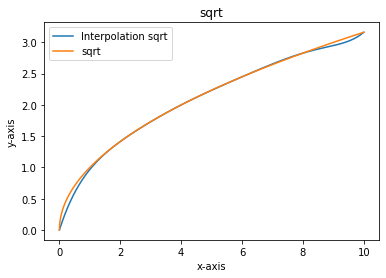

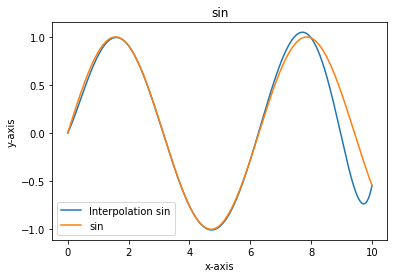

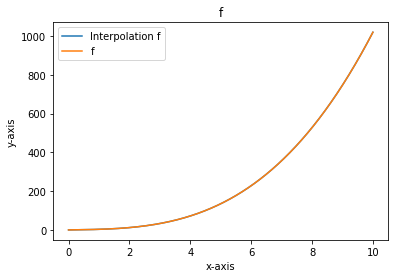

In [18]:
hermite_interpolation_with_derivative(0, 10, 5, [1,2])

Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego


Efekt Rungego (od nazwiska Carla Rungego, niemieckiego matematyka) – pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  0.2500000000 │ 0.5000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  0.5000000000 │ 0.7071067812 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  0.7500000000 │ 0.8660254038 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.0000000000 │ 1.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.2500000000 │ 1.1180339887 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.5000000000 │ 1.2247448714 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.7500000000 │ 1.3228756555 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.0000000000 │ 1.4142135624 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.2500000000 │ 1.5000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │

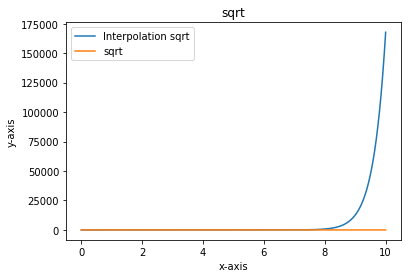

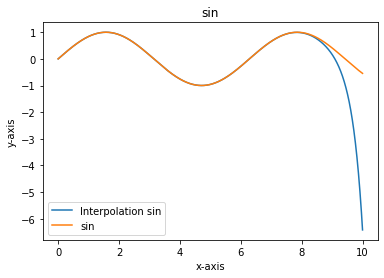

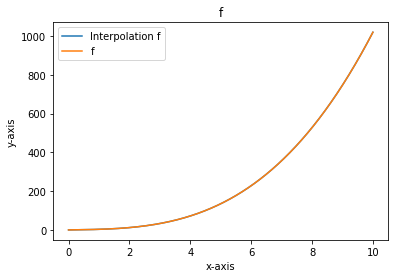

In [19]:
hermite_interpolation_with_derivative(0, 10, 40, [])

Zadanie 4: Interpolacja funkcjami sklejanymi
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji).

In [0]:
def compare_charts_1(min, max, num_of_point, func1, func2, func_name):
    x_array = np.linspace(min, max, num_of_point)
    func1_array = func1(x_array)
    func2_array = func2(x_array)
    plt.plot(x_array, func1_array, label="Interpolation B-spline " + func_name)
    plt.plot(x_array, func2_array, label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()


def compare_results_1(min, max, num_of_point, func1, func2 , name_func, error_array):
    table = []
    step = (max - min) / num_of_point
    for i in np.arange(min+(step/2), max+(step/2), step):
        table.append([i, func1(i), func2(i), abs(func2(i)-func1(i))/abs(func1(i))])
        error_array.append(abs(func2(i)-func1(i))/abs(func1(i)))
    print(tabulate(table, headers=['x', name_func, 'interpolation '+name_func, 'relative error [%]'], tablefmt="fancy_grid", floatfmt=".10f"))


def calculate_Bspline(x_array, y_array):
    t, c, k = interpolate.splrep(x_array, y_array, s=0, k=2)
    return interpolate.BSpline(t, c, k, extrapolate=False)


def Bspline_interpolation(min, max, number_of_points):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table(min, max, number_of_points, np.sqrt, "sqrt(x)", False)
    f_x_array, f_y_array = func_to_table(min, max, number_of_points, f, "x^3 + 2*x", False)
    sin_x_array, sin_y_array = func_to_table(min, max, number_of_points, np.sin, "sin(x)", False)

    compare_charts_1(min, max, 10000, calculate_Bspline(sqrt_x_array, sqrt_y_array), np.sqrt, "sqrt")
    compare_results_1(min, max, number_of_points, calculate_Bspline(sqrt_x_array, sqrt_y_array), np.sqrt, "sqrt", error_array_Bspline)
    compare_charts_1(min, max, 10000, calculate_Bspline(sin_x_array, sin_y_array), np.sin, "sin")
    compare_results_1(min, max, number_of_points, calculate_Bspline(sin_x_array, sin_y_array), np.sin, "sin", error_array_Bspline)
    compare_charts_1(min, max, 10000, calculate_Bspline(f_x_array, f_y_array), f, "f")
    compare_results_1(min, max, number_of_points, calculate_Bspline(f_x_array, f_y_array), f, "f", error_array_Bspline)


Interpolacja B-spline dla 3 węzłów : 

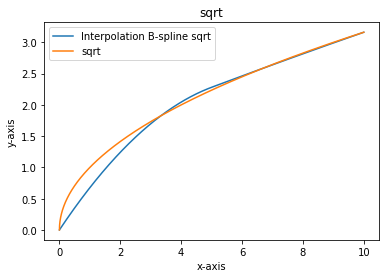

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.6666666667 │ 1.0651731262 │         1.2909944487 │         0.2120043371 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2817061964 │         2.2360679775 │         0.0200017947 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.3333333333 │ 2.8755127187 │         2.8867513459 │         0.0039083907 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


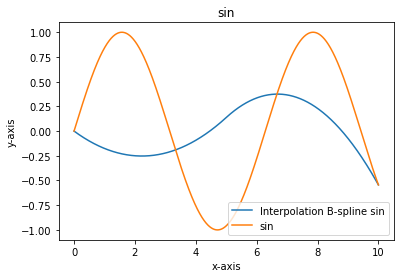

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.6666666667 │ -0.2363235987 │        0.9954079578 │         5.2120548400 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │  0.1372669075 │       -0.9589242747 │         7.9858372427 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.3333333333 │  0.1470552244 │        0.8872941081 │         5.0337476039 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


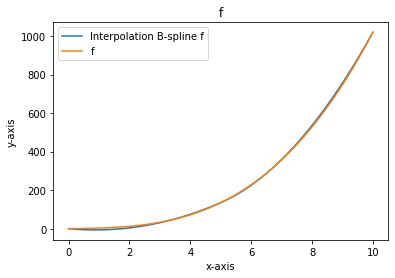

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.6666666667 │  -1.2962962963 │      7.9629629630 │         7.1428571429 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.3333333333 │ 604.6296296296 │    595.3703703704 │         0.0153139357 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [21]:
Bspline_interpolation(0, 10, 3)

Interpolacja B-spline dla 4 węzłów : 

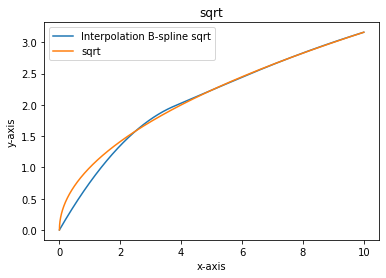

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.2500000000 │ 0.9226650813 │         1.1180339887 │         0.2117441218 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.7500000000 │ 1.9754212462 │         1.9364916731 │         0.0197069730 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 6.2500000000 │ 2.4936346717 │         2.5000000000 │         0.0025526307 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 8.7500000000 │ 2.9614937837 │         2.9580398915 │         0.0011662669 │
╘══════════════╧══════════════╧══════════════════════╧══════════════════════╛


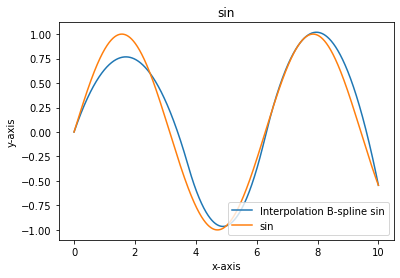

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.2500000000 │  0.7133425046 │        0.9489846194 │         0.3303351662 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.7500000000 │ -0.3446110814 │       -0.5715613187 │         0.6585691800 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 6.2500000000 │ -0.0874845382 │       -0.0331792165 │         0.6207419366 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 8.7500000000 │  0.7858211192 │        0.6247239538 │         0.2050048816 │
╘══════════════╧═══════════════╧═════════════════════╧══════════════════════╛


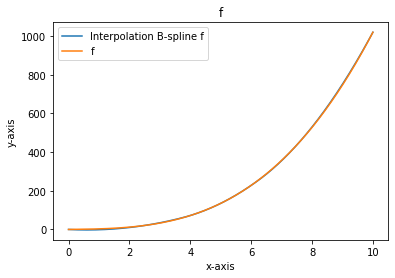

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.2500000000 │   0.2678571429 │      4.4531250000 │        15.6250000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.7500000000 │  61.0714285714 │     60.2343750000 │         0.0137061404 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 6.2500000000 │ 255.8035714286 │    256.6406250000 │         0.0032722513 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 8.7500000000 │ 691.6071428571 │    687.4218750000 │         0.0060515105 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛


In [22]:
Bspline_interpolation(0, 10, 4)

Interpolacja B-spline dla 5 węzłów : 

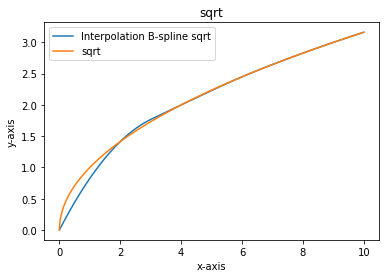

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 1.0000000000 │ 0.8252775520 │         1.0000000000 │         0.2117135593 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.0000000000 │ 1.7668080311 │         1.7320508076 │         0.0196723260 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.0000000000 │ 2.2307285112 │         2.2360679775 │         0.0023935976 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 7.0000000000 │ 2.6467798731 │         2.6457513111 │         0.0003886088 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 9.0000000000 │ 3.0002597204 │         3.0000000000 │         0.0000865660 │
╘══════════════╧══════════════╧══════════════════════╧══════════

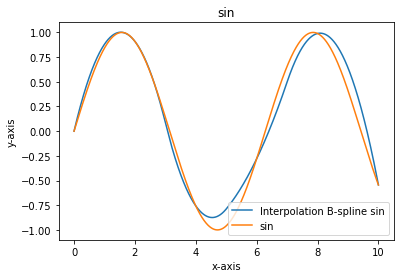

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 1.0000000000 │  0.8805439767 │        0.8414709848 │         0.0443736974 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.0000000000 │  0.0862603502 │        0.1411200081 │         0.6359776844 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.0000000000 │ -0.7881263522 │       -0.9589242747 │         0.2167138835 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 7.0000000000 │  0.4976257887 │        0.6569865987 │         0.3202422655 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 9.0000000000 │  0.6421426134 │        0.4121184852 │         0.3582134613 │
╘══════════════╧═══════════════╧═════════════════════╧══════════

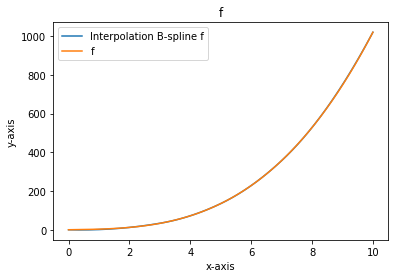

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 1.0000000000 │   0.8823529412 │      3.0000000000 │         2.4000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.0000000000 │  33.3529411765 │     33.0000000000 │         0.0105820106 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.0000000000 │ 135.0000000000 │    135.0000000000 │         0.0000000000 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 7.0000000000 │ 356.6470588235 │    357.0000000000 │         0.0009896091 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 9.0000000000 │ 749.1176470588 │    747.0000000000 │         0.0028268551 │
╘══════════════╧════════════════╧═══════════════════╧══════════════════════╛

In [23]:
Bspline_interpolation(0, 10, 5)

Interpolacja B-spline dla 8 węzłów : 

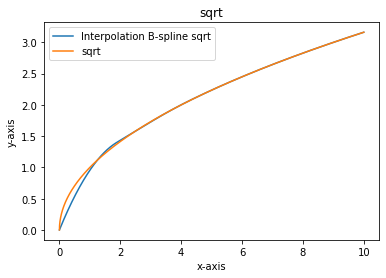

╒══════════════╤══════════════╤══════════════════════╤══════════════════════╕
│            x │         sqrt │   interpolation sqrt │   relative error [%] │
╞══════════════╪══════════════╪══════════════════════╪══════════════════════╡
│ 0.6250000000 │ 0.6524386738 │         0.7905694150 │         0.2117145209 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 1.8750000000 │ 1.3967859449 │         1.3693063938 │         0.0196734161 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 3.1250000000 │ 1.7635369321 │         1.7677669530 │         0.0023986006 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 4.3750000000 │ 2.0925144750 │         2.0916500663 │         0.0004130957 │
├──────────────┼──────────────┼──────────────────────┼──────────────────────┤
│ 5.6250000000 │ 2.3716148203 │         2.3717082451 │         0.0000393929 │
├──────────────┼──────────────┼──────────────────────┼──────────

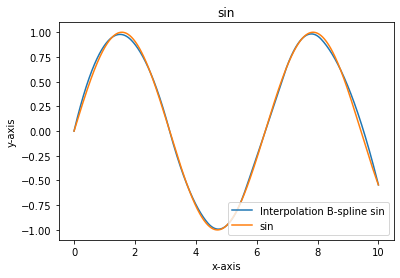

╒══════════════╤═══════════════╤═════════════════════╤══════════════════════╕
│            x │           sin │   interpolation sin │   relative error [%] │
╞══════════════╪═══════════════╪═════════════════════╪══════════════════════╡
│ 0.6250000000 │  0.6417739609 │        0.5850972729 │         0.0883125390 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 1.8750000000 │  0.9216319754 │        0.9540857816 │         0.0352134118 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 3.1250000000 │  0.0182612408 │        0.0165918922 │         0.0914148503 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 4.3750000000 │ -0.9235561189 │       -0.9436221923 │         0.0217269671 │
├──────────────┼───────────────┼─────────────────────┼──────────────────────┤
│ 5.6250000000 │ -0.5988669013 │       -0.6116822500 │         0.0213993271 │
├──────────────┼───────────────┼─────────────────────┼──────────

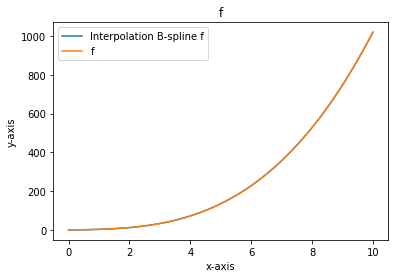

╒══════════════╤════════════════╤═══════════════════╤══════════════════════╕
│            x │              f │   interpolation f │   relative error [%] │
╞══════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ 0.6250000000 │   0.9762356172 │      1.4941406250 │         0.5305123054 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 1.8750000000 │  10.4306681485 │     10.3417968750 │         0.0085201899 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 3.1250000000 │  36.7522554916 │     36.7675781250 │         0.0004169168 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 4.3750000000 │  92.4932989017 │     92.4902343750 │         0.0000331324 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤
│ 5.6250000000 │ 189.2254510983 │    189.2285156250 │         0.0000161951 │
├──────────────┼────────────────┼───────────────────┼──────────────────────┤

In [24]:
Bspline_interpolation(0, 10, 8)

#Porównanie wyników : 

Średni błąd dla interpolacji B-spline wynosi w [%] :

In [25]:
print(np.sum(error_array_Bspline) / len(error_array_Bspline))

0.8210782801266635


Średni błąd dla interpolacji Hermite'a wynosi w [%] :

In [26]:
print(np.sum(error_array_Hermitea) / len(error_array_Hermitea))

0.362241389381302


Średni błąd dla interpolacji Newtona wynosi w [%] :

In [27]:
print(np.sum(error_array_Newton) / len(error_array_Newton))

0.362241389381149
